Instalação de dependências

In [15]:
# !pip install pandas numpy matplotlib scikit-learn xgboost jinja2

Importação dos dados armazenados no banco de dados 
  - Inicialmente utilizando apenas ofertas da Apple
  - Cada captura corresponde a até 10 ofertas, sendo igualmente dividas entre compra e venda 
  - Cada oferta contém preço e volume, além de um tipo associado
  - Ask indica uma oferta de compra
  - Bid indica uma oferta de venda
  - As capturas também acompanham as melhores ofertas negociadas, mas esses dados não nos interessam por hora

In [16]:
import os
import pandas as pd
import numpy as np

input_path = os.path.join('df_final.csv')
df = pd.read_csv(input_path, parse_dates=["File_Date"])

# APPLE INC COM or CISCO SYS INC COM
df = df[(df["Company"] == "APPLE INC COM") | (df["Company"] == "CISCO SYS INC COM")]
df = df[["File_Date", "Price_of_One_Share", "Transaction_type", "Number_of_Shares_Sold", "Time", "Company" ]]
df.head(10) #print

,File_Date,Price_of_One_Share,Transaction_type,Number_of_Shares_Sold,Time,Company
0,2024-07-10 12:21:57,230.90,asks,1.0,11:21:47,APPLE INC COM
1,2024-07-10 12:21:57,230.94,asks,1.0,11:21:49,APPLE INC COM
2,2024-07-10 12:21:57,230.92,bids,7.0,11:21:40,APPLE INC COM
3,2024-07-10 12:21:57,230.92,bids,5.0,11:21:40,APPLE INC COM
4,2024-07-10 12:21:57,230.92,bids,3.0,11:21:40,APPLE INC COM
5,2024-07-10 12:21:57,230.90,asks,400.0,11:21:47,APPLE INC COM
6,2024-07-10 12:21:57,230.91,bids,1.0,11:21:43,APPLE INC COM
7,2024-07-10 12:21:57,230.91,asks,52.0,11:21:47,APPLE INC COM
8,2024-07-10 12:21:57,230.91,asks,48.0,11:21:47,APPLE INC COM
9,2024-07-10 12:21:57,230.92,bids,1.0,11:21:40,APPLE INC COM


In [17]:
df["Company"] = df["Company"].str.split(" ").str[0]
df.head(10) #print

,File_Date,Price_of_One_Share,Transaction_type,Number_of_Shares_Sold,Time,Company
0,2024-07-10 12:21:57,230.90,asks,1.0,11:21:47,APPLE
1,2024-07-10 12:21:57,230.94,asks,1.0,11:21:49,APPLE
2,2024-07-10 12:21:57,230.92,bids,7.0,11:21:40,APPLE
3,2024-07-10 12:21:57,230.92,bids,5.0,11:21:40,APPLE
4,2024-07-10 12:21:57,230.92,bids,3.0,11:21:40,APPLE
5,2024-07-10 12:21:57,230.90,asks,400.0,11:21:47,APPLE
6,2024-07-10 12:21:57,230.91,bids,1.0,11:21:43,APPLE
7,2024-07-10 12:21:57,230.91,asks,52.0,11:21:47,APPLE
8,2024-07-10 12:21:57,230.91,asks,48.0,11:21:47,APPLE
9,2024-07-10 12:21:57,230.92,bids,1.0,11:21:40,APPLE


Renomeando as colunas
  - Os nomes simples facilitarão na hora de aplicar a janela deslizante

In [18]:
df = df.rename(columns={
    'File_Date': 'Fdate', 
    'Price_of_One_Share': 'P', 
    'Transaction_type': 'Type', 
    'Number_of_Shares_Sold': 'S',
    'Time': 'T',
    'Company': 'C'
})

df #print

,Fdate,P,Type,S,T,C
0,2024-07-10 12:21:57,230.90,asks,1.0,11:21:47,APPLE
1,2024-07-10 12:21:57,230.94,asks,1.0,11:21:49,APPLE
2,2024-07-10 12:21:57,230.92,bids,7.0,11:21:40,APPLE
3,2024-07-10 12:21:57,230.92,bids,5.0,11:21:40,APPLE
4,2024-07-10 12:21:57,230.92,bids,3.0,11:21:40,APPLE
...,...,...,...,...,...,...
5751325,2024-10-18 18:00:08,56.74,bids,100.0,15:59:59,CISCO
5751326,2024-10-18 18:00:08,56.75,bids,60.0,15:59:59,CISCO
5751327,2024-10-18 18:00:08,56.77,bids,1.0,15:59:59,CISCO
5751328,2024-10-18 18:00:08,56.76,bids,100.0,15:59:59,CISCO


Eliminando capturas sem dados

In [19]:
df = df.dropna().reset_index(drop=True)
df #print

,Fdate,P,Type,S,T,C
0,2024-07-10 12:21:57,230.90,asks,1.0,11:21:47,APPLE
1,2024-07-10 12:21:57,230.94,asks,1.0,11:21:49,APPLE
2,2024-07-10 12:21:57,230.92,bids,7.0,11:21:40,APPLE
3,2024-07-10 12:21:57,230.92,bids,5.0,11:21:40,APPLE
4,2024-07-10 12:21:57,230.92,bids,3.0,11:21:40,APPLE
...,...,...,...,...,...,...
600904,2024-10-18 18:00:08,56.74,bids,100.0,15:59:59,CISCO
600905,2024-10-18 18:00:08,56.75,bids,60.0,15:59:59,CISCO
600906,2024-10-18 18:00:08,56.77,bids,1.0,15:59:59,CISCO
600907,2024-10-18 18:00:08,56.76,bids,100.0,15:59:59,CISCO


Realizando ordenação por data de captura e tipo de oferta
  - Isso é essencial para agrupar posteriormente esses dados

In [20]:
# df = df.sort_values(by=['Fdate', 'Type'], ascending=[True, True]).reset_index(drop=True)
# df.head(11) #print

Unindo o horário de capturas iniciadas e finalizadas em momentos diferentes 
  - Todas as ofertas armazenarão o horário da captura, mesmo que tenham sido armazenadas segundos depois
  - A duração considerada é de até 5 segundos
  - A partir da duração considerada, qualquer oferta será associada a uma nova captura

In [21]:
df2 = df.copy()
threshold = 5 #segundos

df2['Fdate'] = pd.to_datetime(df2['Fdate'])
# Cria-se uma coluna "group" que identifica ofertas capturadas dentro de um intervalo de 5 segundos
# cumsum() garante que cada grupo tenha um valor único
df2['group'] = (df2['Fdate'] - df2['Fdate'].shift().fillna(df2['Fdate'].min())).dt.total_seconds().gt(threshold).cumsum()
# Todas as ofertas dentro de um mesmo grupo recebem a data da primeira oferta
df2['Fdate'] = df2.groupby('group').transform('first')['Fdate']
df2 = df2.drop('group', axis=1)

df2 #print

,Fdate,P,Type,S,T,C
0,2024-07-10 12:21:57,230.90,asks,1.0,11:21:47,APPLE
1,2024-07-10 12:21:57,230.94,asks,1.0,11:21:49,APPLE
2,2024-07-10 12:21:57,230.92,bids,7.0,11:21:40,APPLE
3,2024-07-10 12:21:57,230.92,bids,5.0,11:21:40,APPLE
4,2024-07-10 12:21:57,230.92,bids,3.0,11:21:40,APPLE
...,...,...,...,...,...,...
600904,2024-10-18 18:00:08,56.74,bids,100.0,15:59:59,CISCO
600905,2024-10-18 18:00:08,56.75,bids,60.0,15:59:59,CISCO
600906,2024-10-18 18:00:08,56.77,bids,1.0,15:59:59,CISCO
600907,2024-10-18 18:00:08,56.76,bids,100.0,15:59:59,CISCO


Reordenam-se as transações para facilitar o treinamento do modelo

In [23]:
df2 = df2.set_index(['Fdate'])
df2['T'] = pd.to_datetime(df2['T'], format='%H:%M:%S').dt.time
df2 = df2.sort_values(by=['Fdate', 'C', 'T'], ascending=[True, True, False]).reset_index()

df2.head(20) #print

,Fdate,P,Type,S,T,C
0,2024-07-10 12:21:57,230.940,asks,1.0,11:21:49,APPLE
1,2024-07-10 12:21:57,230.900,asks,1.0,11:21:47,APPLE
2,2024-07-10 12:21:57,230.900,asks,400.0,11:21:47,APPLE
3,2024-07-10 12:21:57,230.910,asks,52.0,11:21:47,APPLE
4,2024-07-10 12:21:57,230.910,asks,48.0,11:21:47,APPLE
5,2024-07-10 12:21:57,230.910,bids,1.0,11:21:43,APPLE
6,2024-07-10 12:21:57,230.920,bids,7.0,11:21:40,APPLE
7,2024-07-10 12:21:57,230.920,bids,5.0,11:21:40,APPLE
8,2024-07-10 12:21:57,230.920,bids,3.0,11:21:40,APPLE
9,2024-07-10 12:21:57,230.920,bids,1.0,11:21:40,APPLE


In [24]:
df2 = df2.drop('T', axis=1)

Para que as capturas sejam agrupadas por horário, precisamos ter diferentes níveis para cada tipo de oferta.
  - Haverão 5 níveis de ask e 5 níveis de bid por captura
  - Como cada nível terá um valor único na coluna "Type", poderemos usá-los como colunas
  - Teremos então preços e shares para cada nível, totalizando 20 colunas por captura
  - Os indivíduos do novo dataframe representarão cada captura

In [25]:
df2['N'] = df2.groupby(['Fdate', 'Type']).cumcount() + 1
df2['Type'] = df2['Type'].str[0] + '_' + df2['N'].astype('str')

df2 = df2.drop('N', axis=1)
print(df2.head(5)) #print
print(df2.tail(5)) #print

                Fdate       P Type      S      C
0 2024-07-10 12:21:57  230.94  a_1    1.0  APPLE
1 2024-07-10 12:21:57  230.90  a_2    1.0  APPLE
2 2024-07-10 12:21:57  230.90  a_3  400.0  APPLE
3 2024-07-10 12:21:57  230.91  a_4   52.0  APPLE
4 2024-07-10 12:21:57  230.91  a_5   48.0  APPLE
                     Fdate      P Type      S      C
600904 2024-10-18 18:00:08  56.74  b_1  100.0  CISCO
600905 2024-10-18 18:00:08  56.75  b_2   60.0  CISCO
600906 2024-10-18 18:00:08  56.77  b_3    1.0  CISCO
600907 2024-10-18 18:00:08  56.76  b_4  100.0  CISCO
600908 2024-10-18 18:00:08  56.76  b_5   95.0  CISCO


In [26]:
df3 = df2.copy()

In [27]:
df3 = df3.pivot(columns=['Type'], index=['Fdate', 'C'], values=['P', 'S'])

# Flatten the columns
df3.columns = ['_'.join(col).strip() for col in df3.columns.values]

df3 = df3.reset_index()

# Add company name to the columns
df3 = df3.pivot(columns=['C'], index=['Fdate'])
df3.columns = ['_'.join(col).strip() for col in df3.columns.values]

print(df3.head())

                     P_a_1_APPLE  P_a_1_CISCO  P_a_10_APPLE  P_a_10_CISCO  \
Fdate                                                                       
2024-07-10 12:21:57       230.94          NaN           NaN           NaN   
2024-07-10 12:22:03          NaN       45.905           NaN           NaN   
2024-07-10 12:23:02       230.87          NaN           NaN           NaN   
2024-07-10 12:23:08          NaN       45.910           NaN           NaN   
2024-07-10 12:25:41       230.85          NaN           NaN           NaN   

                     P_a_2_APPLE  P_a_2_CISCO  P_a_3_APPLE  P_a_3_CISCO  \
Fdate                                                                     
2024-07-10 12:21:57       230.90          NaN       230.90          NaN   
2024-07-10 12:22:03          NaN        45.91          NaN        45.91   
2024-07-10 12:23:02       230.87          NaN       230.87          NaN   
2024-07-10 12:23:08          NaN        45.91          NaN        45.91   
2024-07-10

In [2]:
df3 = df3.pivot(columns=['Type'], index=['Fdate', 'C'], values=['P', 'S'])
df3 #print

NameError: name 'df2' is not defined

Eliminando capturas duplicadas

O scrapper continua funcionando após fechamento da bolsa, o que provoca capturas novas com os mesmos dados repetidamente, isso gera um viés no modelo.
Para corrigir o problema, eliminamos capturas duplicadas

In [38]:
# delete duplicated entries
df2 = df2.drop_duplicates()

Verificando que não há informações faltantes.<br>
O fato de haverem exatamente 20 colunas por captura indica que não há capturas irregulares (com mais ofertas), o que demonstra a eficácia dos técnicas de tratamento empregadas.
Capturas com menos ofertas possuiriam valores faltantes (NaN), o que não ocorre.  

In [39]:
df2[df2.isna().any(axis=1)] #print

Empty DataFrame
Columns: [(P, APPLE, a_1), (P, APPLE, a_2), (P, APPLE, a_3), (P, APPLE, a_4), (P, APPLE, a_5), (P, APPLE, b_1), (P, APPLE, b_2), (P, APPLE, b_3), (P, APPLE, b_4), (P, APPLE, b_5), (S, APPLE, a_1), (S, APPLE, a_2), (S, APPLE, a_3), (S, APPLE, a_4), (S, APPLE, a_5), (S, APPLE, b_1), (S, APPLE, b_2), (S, APPLE, b_3), (S, APPLE, b_4), (S, APPLE, b_5)]
Index: []

Os multi-índices são planificados para facilitar a manipulação dos dados

In [40]:
def get_renamed_df(df, i):
    df.columns = [f'{col}-{i}' for col in df.columns]
    return df

window = 3
df_lag = get_renamed_df(df2.copy(), 0)

for i in range(1, window):
  temp_df = get_renamed_df(df2.copy().shift(i), i)
  df_lag = pd.concat([df_lag, temp_df], axis=1)

temp_df = df2.copy().shift(-1)
df_lag = pd.concat([df_lag, temp_df], axis=1)

df_lag = df_lag.dropna()
df_lag.columns #print

Index(['('P', 'APPLE', 'a_1')-0', '('P', 'APPLE', 'a_2')-0',
       '('P', 'APPLE', 'a_3')-0', '('P', 'APPLE', 'a_4')-0',
       '('P', 'APPLE', 'a_5')-0', '('P', 'APPLE', 'b_1')-0',
       '('P', 'APPLE', 'b_2')-0', '('P', 'APPLE', 'b_3')-0',
       '('P', 'APPLE', 'b_4')-0', '('P', 'APPLE', 'b_5')-0',
       '('S', 'APPLE', 'a_1')-0', '('S', 'APPLE', 'a_2')-0',
       '('S', 'APPLE', 'a_3')-0', '('S', 'APPLE', 'a_4')-0',
       '('S', 'APPLE', 'a_5')-0', '('S', 'APPLE', 'b_1')-0',
       '('S', 'APPLE', 'b_2')-0', '('S', 'APPLE', 'b_3')-0',
       '('S', 'APPLE', 'b_4')-0', '('S', 'APPLE', 'b_5')-0',
       '('P', 'APPLE', 'a_1')-1', '('P', 'APPLE', 'a_2')-1',
       '('P', 'APPLE', 'a_3')-1', '('P', 'APPLE', 'a_4')-1',
       '('P', 'APPLE', 'a_5')-1', '('P', 'APPLE', 'b_1')-1',
       '('P', 'APPLE', 'b_2')-1', '('P', 'APPLE', 'b_3')-1',
       '('P', 'APPLE', 'b_4')-1', '('P', 'APPLE', 'b_5')-1',
       '('S', 'APPLE', 'a_1')-1', '('S', 'APPLE', 'a_2')-1',
       '('S', 'APPLE', '

In [15]:
# count df_lag rows
print(len(df_lag.index)) #print

28572


Treinamento do modelo
  - Utiliza-se XGBoost para prever os preços e volumes de cada nível de asks e bids
  - A previsão é do tipo multioutput, ou seja, teremos 20 saídas para cada observação
  - A proporção entre os conjuntos de treino e teste é de 4:1
  - As métricas de avaliação são o R2 (coeficiente de determinação) e o RMSE (raiz do erro quadrático médio)

In [16]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# train_size = int(len(df_lag)*0.8)
# train = df_lag[:train_size]
# test = df_lag[train_size:]

target_variables = [col for col in df_lag.columns if len(col) == 4]
features = [col for col in df_lag.columns if col not in target_variables]

X_train, X_test, y_train, y_test = train_test_split(
    df_lag[features],
    df_lag[target_variables],
    test_size=0.2,
    random_state=42
)

# X_train = train[features]
# y_train = train[target_variables]
# X_test = test[features]
# y_test = test[target_variables]

model = xgb.XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred, multioutput='raw_values')
mape = mean_absolute_percentage_error(y_test, y_pred, multioutput='raw_values')
mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
rmse = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values'))


Impressão dos resultados

In [17]:
results = pd.DataFrame({
    'MAE': mae,
    'MAPE': mape,
    'MSE': mse,
    'RMSE': rmse,
    'R2': r2,
}, index=y_test.columns)

results #print

,MAE,MAPE,MSE,RMSE,R2
Pa_1,0.137980,0.000622,0.074417,0.272795,0.997875
Pa_2,0.134544,0.000607,0.075153,0.274140,0.997854
Pa_3,0.135565,0.000611,0.081210,0.284974,0.997682
Pa_4,0.133743,0.000603,0.078167,0.279583,0.997768
Pa_5,0.135041,0.000609,0.078589,0.280338,0.997756
Pb_1,0.134903,0.000608,0.083438,0.288856,0.997619
Pb_2,0.133908,0.000603,0.076554,0.276683,0.997814
Pb_3,0.134855,0.000608,0.075995,0.275672,0.997830
Pb_4,0.133353,0.000601,0.074560,0.273056,0.997872
Pb_5,0.132409,0.000597,0.070859,0.266193,0.997977


In [20]:
print(results.to_latex()) #print

\begin{tabular}{lrrrrr}
\toprule
 & MAE & MAPE & MSE & RMSE & R2 \\
\midrule
Pa_1 & 0.125154 & 0.000563 & 0.066182 & 0.257259 & 0.998057 \\
Pa_2 & 0.124600 & 0.000560 & 0.067218 & 0.259264 & 0.998026 \\
Pa_3 & 0.125890 & 0.000566 & 0.059422 & 0.243767 & 0.998255 \\
Pa_4 & 0.126356 & 0.000569 & 0.077624 & 0.278611 & 0.997720 \\
Pa_5 & 0.123668 & 0.000556 & 0.059542 & 0.244012 & 0.998251 \\
Pb_1 & 0.121954 & 0.000548 & 0.051298 & 0.226491 & 0.998493 \\
Pb_2 & 0.122728 & 0.000552 & 0.055959 & 0.236557 & 0.998356 \\
Pb_3 & 0.123473 & 0.000555 & 0.054469 & 0.233385 & 0.998400 \\
Pb_4 & 0.122558 & 0.000551 & 0.055372 & 0.235313 & 0.998374 \\
Pb_5 & 0.123208 & 0.000554 & 0.060164 & 0.245283 & 0.998233 \\
Sa_1 & 56.312783 & 11.098246 & 11384.825014 & 106.699695 & -0.149718 \\
Sa_2 & 59.148547 & 9.967747 & 18177.653926 & 134.824530 & -0.114934 \\
Sa_3 & 60.692313 & 10.410237 & 19201.985638 & 138.571229 & -0.232827 \\
Sa_4 & 62.123851 & 10.066099 & 18226.819578 & 135.006739 & -0.130061 \\
Sa_5 &

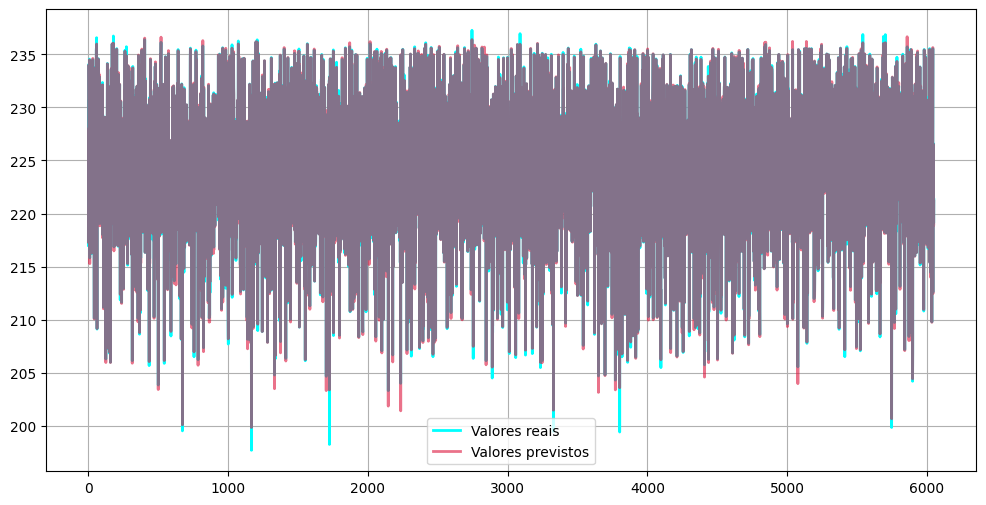

In [22]:
import matplotlib.pyplot as plt

def plot_graph(column):
    x = range(len(y_test))
    plt.figure(figsize=(12, 6))
    plt.tight_layout()

    pred_index = y_test.columns.get_loc(column)

    plt.plot(x, y_test[column], label='Valores reais', alpha=1, lw=2, color='cyan')
    plt.plot(x, y_pred[:, pred_index], label='Valores previstos', alpha=0.6, lw=2, color='crimson')
    # plt.title(f'Gráfico de valores reais × previstos para {column}')

    plt.legend()
    plt.grid(True)
    plt.show()

plot_graph('Pa_5') #print

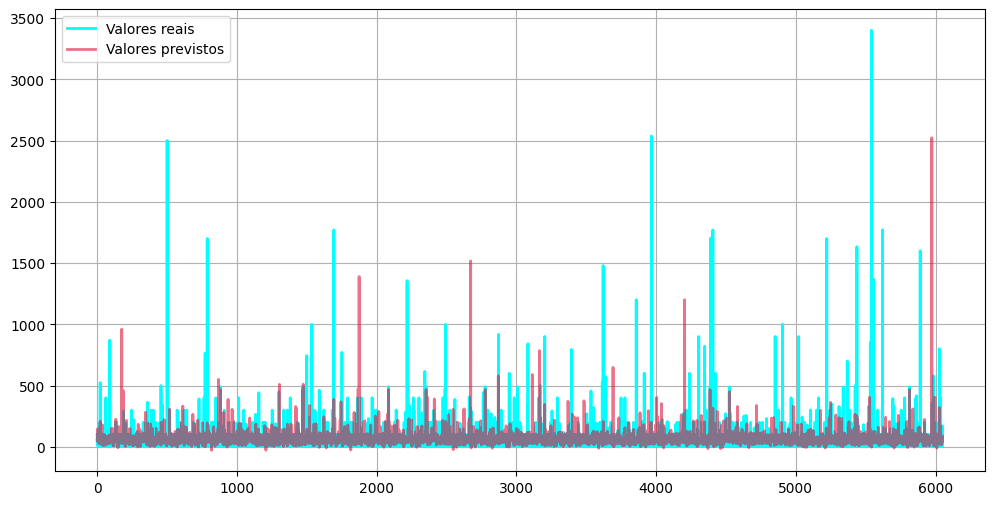

In [23]:
plot_graph('Sa_5') #print